<a href="https://colab.research.google.com/github/ougrid/my-knowledge-resource/blob/master/Copy_of_%5B20240127%5D_Coding_for_AI_Industrial_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coding for AI Industrial Application

## เนื้อหา
- OpenCV
- Pre-trained Model
- Yolov8

## OpenCV (Open Source Computer Vision Library)

- เป็น package สำหรับการทำงานทางด้าน Computer vision
- มีฟังก์ชันสำหรับการทำงานทางด้าน Computer vision และ imager processing มากมาย
- เหมาะกับการเริ่มต้นเรียนรู้การทำงานทางด้าน Computer vision และ Image procession


In [ ]:
import cv2

###การอ่านภาพ แสดงผล และบันทึกภาพ

In [ ]:
!rm -rf demoimages
!git clone https://github.com/pingkung/demoimages.git

- การอ่านภาพเข้ามาในโปรแกรมด้วย openCV

In [ ]:
import cv2
import os

img = cv2.imread(os.path.join('demoimages', 'color_image.png'))

- การแสดงผลภาพด้วย openCV

In [ ]:
from google.colab.patches import cv2_imshow

cv2_imshow(img)

- เรายังสามารถ save รูปภาพได้อีกด้วย

In [ ]:
cv2.imwrite('saveImg.png', img)

### ระบบภาพใน openCV และการใช้งาน

- ที่จริงแล้ว ภาพ ก็คือข้อมูล matrix ที่ระบุความเข้มของสีแต่ละสี
- ซึ่งใน openCV นั้น จะเรียง channel สีคือ B(blue) G(green) R(red)

In [ ]:
import cv2

img = cv2.imread(os.path.join('demoimages', 'segment.png'))
print(img.shape)
cv2_imshow(img)
# cv2_imshow(img[:,:,0])
# cv2_imshow(img[:,:,1])
# cv2_imshow(img[:,:,2])

- ดังนั้น เราสามารถสร้างภาพขึ้นมาได้เช่นกัน

In [ ]:
import numpy as np
npImg = np.full((255,255,3),255,float)
cv2_imshow(npImg)

In [ ]:
npBlue = np.full((255,255),0,float)
npGreen = np.full((255,255),0,float)
npRed = np.full((255,255),255,float)

npImg = cv2.merge([npBlue, npGreen, npRed])
cv2_imshow(npImg)

- แต่ในบางครั้ง การทำงานเกี่ยวกับรูปภาพ เราอาจทำงานบนภาพสีเทา (Gray Scale Image) หรือภาพขาว-ดำ (Binary Image)
- ใน openCV เราสามารถแปลงภาพสี ให้เป็นภาพสีเทา หรือภาพขาวดำได้โดย

In [ ]:
img = cv2.imread(os.path.join('demoimages', 'color_image.png'))
cv2_imshow(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img)
img = cv2.imread(os.path.join('demoimages', 'color_image.png'), 0)
cv2_imshow(img)

- โดย openCV จะทำการคำนวณสีเทาด้วยสมการ grayscale image = ( (0.3 * R) + (0.59 * G) + (0.11 * B) )
- [imread flag](https://docs.opencv.org/4.x/d8/d6a/group__imgcodecs__flags.html#gga61d9b0126a3e57d9277ac48327799c80af660544735200cbe942eea09232eb822)
- หากเราต้องการภาพขาว-ดำ หรือ binary image เราจะทำการแปลงจากภาพสีเทาอีกทีหนึ่ง โดย

In [ ]:
_, binaryImg = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY)
cv2_imshow(binaryImg)

In [ ]:
_, binaryImg = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(binaryImg)

### การวาดและเขียนข้อความลงในรูปภาพ

- ใน openCV เราสามารถทำการวาดรูปทรงต่างๆลงไปบนภาพที่เราต้องการได้

In [ ]:
import numpy as np

img = np.full((500,500,3),255,float)

#      image, start point, end point, color, thickness
cv2.line(img,(0,0),(500,500),(255,0,0),10)
cv2_imshow(img)

In [ ]:
img = np.full((500,500,3),255,float)

#image, Vertex of the rectangle, Vertex of the rectangle opposite to pt1, color, thickness
cv2.rectangle(img,(200,200),(300,300),(255,0,0),-1)
cv2_imshow(img)

In [ ]:
img = np.full((500,500,3),255,float)

#image, center of circle, radius, color, thickness
cv2.circle(img,(250,250), 200, (255,0,0), -1)
cv2_imshow(img)

In [ ]:
img = np.full((500,500,3),255,float)

cv2.rectangle(img,(200,200),(300,300),(255,0,0),-1)
cv2.circle(img,(200,200), 10, (0,0,255), 3)
cv2.circle(img,(300,300), 10, (0,0,255), 3)
cv2_imshow(img)

In [ ]:
img = np.full((500,500,3),255,float)

cv2.rectangle(img,(200,200),(300,300),(255,0,0),-1)

# image, text, Bottom-left corner of the text string in the image, font, fontScale, color, thickness
cv2.putText(img,'openCV',(200,200),cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),2)
cv2_imshow(img)

- FONT_HERSHEY_SIMPLEX 		normal size sans-serif font
- FONT_HERSHEY_PLAIN 		small size sans-serif font
- FONT_HERSHEY_DUPLEX 		normal size sans-serif font (more complex than - FONT_HERSHEY_SIMPLEX )
- FONT_HERSHEY_COMPLEX 		normal size serif font
- FONT_HERSHEY_TRIPLEX 		normal size serif font (more complex than - FONT_HERSHEY_COMPLEX )
- FONT_HERSHEY_COMPLEX_SMALL 	smaller version of - FONT_HERSHEY_COMPLEX
- FONT_HERSHEY_SCRIPT_SIMPLEX 	hand-writing style font
- FONT_HERSHEY_SCRIPT_COMPLEX 	more complex variant of - FONT_HERSHEY_SCRIPT_SIMPLEX

### แบบฝึกหัดที่ 1

1. ให้ทำการสร้างรูปด้วย numpy โดยให้มีสีขาวทั้งภาพ ขนาด 500x500 pixel

2. ทำการวาดรูปสี่เหลี่ยมขนาด 400x400 ลงกึ่งกลางภาพ โดยมีสีเขียว และเป็นสีทึบ

3. ทำการเขียนข้อความ "We love Python" ด้วยอักษรสีเขียว ลงกึ่งกลางภาพ

### การเลือกบางส่วนของภาพ (Crop)

- เนื่องจากรูปภาพนั้น คือ matrix ดังนั้น เราสามารถเลือกบางส่วนของภาพ (Crop) ได้โดยการเลือก Index ของ matrix นั่นเอง

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(os.path.join('demoimages', 'color_image.png'))
cv2_imshow(img)

img_crop = img[200:500,200:500]
cv2_imshow(img_crop)

### การหาเส้นรอบรูป

- ใน OpenCV มี function ที่ใช้ในการหาเส้นรอบรูปของวัตุที่อยู่ในภาพ

In [ ]:
img = cv2.imread(os.path.join('demoimages', 'contour.png'))
cv2_imshow(img)

In [ ]:
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, imbinary = cv2.threshold(imgray, 150, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(imbinary)

In [ ]:
contours, hierarchy = cv2.findContours(imbinary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

- contour retrieval algorithm [link](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71)
- contour approximation algorithm [link](https://docs.opencv.org/master/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff)

In [ ]:
cv2.drawContours(img, contours, -1, (0,255,0), 3)
cv2_imshow(img)

In [ ]:
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
  print(cv2.contourArea(cnt))

cv2_imshow(img)

### แบบฝึกหัดที่ 2

1. อ่านภาพ `coin1.jpg`
2. ทำการตีกรอบล้อมรอบเหรียญ พร้อมทั้งพิม `coin: [coin index]`
3. save รูปที่ได้ทำการตีกรอบแล้ว
3. crop เหรียญแต่ละรูป

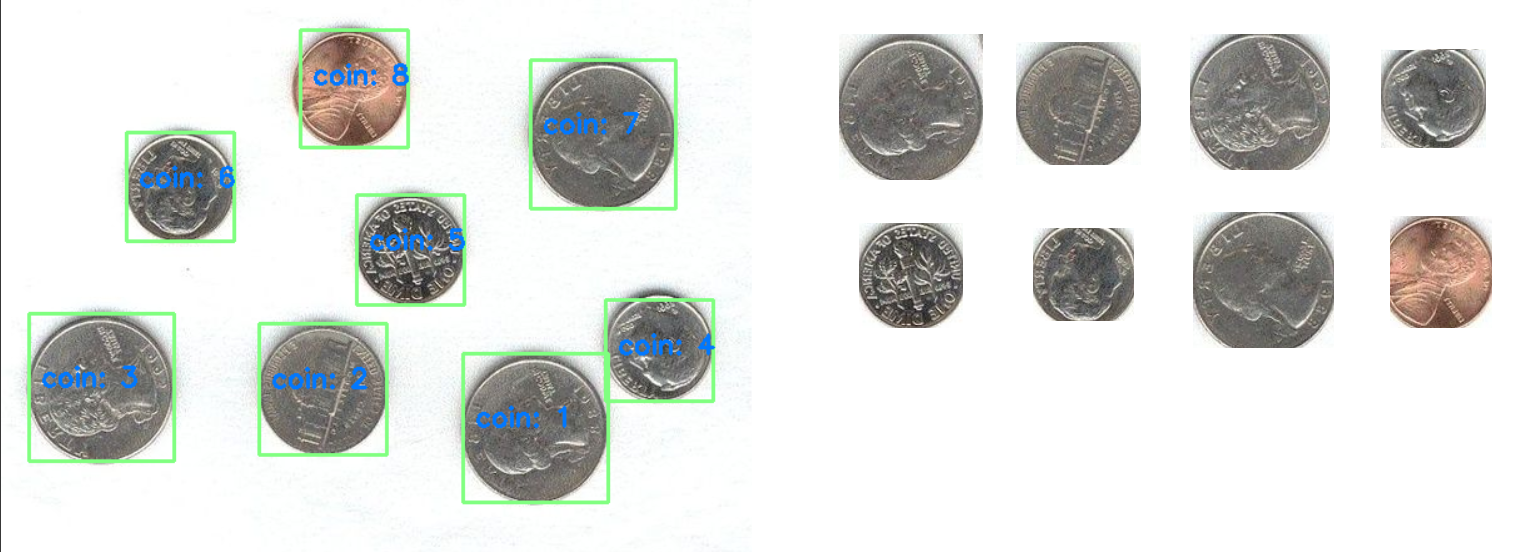

1. อ่านภาพชื่อ coin1.jpg

2. แปลงภาพให้อยู่ในรูปแบบที่เหมาะสม ก่อนทำการหาเส้นรอบรูป

3. หาเส้นรอบรูปของเหรียญ

4. วาดกรอบสี่เหลี่ยม พร้อมทั้งเขียนข้อมูลลำดับเหรียญ save ผลลัพธ์ และทำการ crop เฉพาะเหรียญ

### Image Convolution

- การทำ covolution บนรูปภาพ คือการนำ matrix หรือที่เรียกว่า Kernel หรือ Windows หรือ mask มาทำการคูณในแต่ละ Pixel ของรูปภาพ และทำการเลื่อน kernel ไปจนครบทั้งรูปภาพ

![alt text](https://drive.google.com/uc?id=15ShgYZQVuwwVfx06vYPzYACj8K-PfbNM)

- ลองพิจารณา Kernal ต่อไปนี้

$$\begin{pmatrix} 1&2&1\\
0&0&0\\
-1&-2&-1
\end{pmatrix} $$
และ
$$\begin{pmatrix} 1&0&-1\\
2&0&-2\\
1&0&-1
\end{pmatrix} $$

![alt text](https://drive.google.com/uc?id=1oYlD_yRQPTMZ_6IB2LfiUnblC2BDhgPt)

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from scipy import signal

maskX = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])

imgL = np.full((200,100),0)
imgR = np.full((200,100),255)

img = np.concatenate((imgL,imgR),axis=1)
cv2_imshow(img)
print()
cv2_imshow(signal.convolve2d(img,maskX))


![alt text](https://drive.google.com/uc?id=1lcirP1XP-xQNSulrZs5g-eXqbzx3eiH3)

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
from scipy import signal

maskY = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

imgL = np.full((100,200),0)
imgR = np.full((100,200),255)

img = np.concatenate((imgL,imgR),axis=0)
cv2_imshow(img)
print()
cv2_imshow(signal.convolve2d(img,maskY))


- สิ่งที่เราทำไป คือกระบวนการ convolution ซึ่ง kernel ที่เราใช้นั้น ชื่อว่า Solbel
- หรือที่รู้จักในชื่อ Sobel mask
- ซึ่งใช้สำหรับการทำ edge detection
- ดังนั้น หากเราต้องการทำ edge detection สำหรับภาพ เราจะต้องทำทั้ง 2 แกน และนำผลลัพธ์มารวมกัน
- โดยการรวมนั้น จะรวมแต่ละ pixel ด้วยสมการ Edge gradient
$$
G = \sqrt{G^2_x+G^2_y}
$$
- ซึ่งใน openCV ก็มี funtion ที่ให้เราสามารถทำ Sobel edge detection ได้

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread(os.path.join('demoimages', 'sudoku.png'))
cv2_imshow(img)

sy = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3)
sx = cv2.Sobel(img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3)

# cv2_imshow(sy)
# cv2_imshow(sx)

# edge = np.hypot(sx,sy)
# cv2_imshow(edge)

### Face detection

- สำหับการตรวจจับใบหน้าด้วย openCV นั้น มีมากมายหลายวิธีการ
- ในวันนี้ จะแนะนำวิธีการที่ง่ายและเป็นที่นิยม ชื่อว่า Haar-cascade หรือ Haar like features
- ซึ่งจะเป็นการ matching pattern ที่ได้ทำการเรียนรู้มาแล้ว โดยเราสามารถนำมาใช้ได้เลย

![alt text](https://drive.google.com/uc?id=10_WjN_1sCl248BoUWn9usFhRloj2vbIj)

In [ ]:
import cv2

faceCascade = cv2.CascadeClassifier(os.path.join('demoimages', 'haarcascade_frontalface_default.xml'))

- หลังจากโหลด model ของ Face ที่มีการเทรนมาแล้วนั้น เราก็จะสามารถใช้ Model นี้ในการ detect หรือตรวจหาใบหน้าได้
- แต่ใบหน้านั้น จะต้องอยู่ในโหมดสีเทา

In [ ]:
img = cv2.imread(os.path.join('demoimages', 'color_image.png'))
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2_imshow(img_gray)

faces = faceCascade.detectMultiScale(img_gray)

img_faces = []
img_face = img.copy()

for x,y,w,h in faces:
  cv2.rectangle(img_face,(x,y),(x+w,y+h),(0,0,255),2)
  img_faces.append(img[y:y+h,x:x+w])

cv2_imshow(img_face)

for imf in img_faces:
  cv2_imshow(imf)


###แบบฝึกหัดที่ 3

1. ทำการอ่านภาพ american.jpg และทำการปรับเป็นภาพ gray scale

2. ทำการตรวจจับใบหน้าในภาพ

3. วาดกรอบสี่เหลี่ยมลงบนภาพบริเวณใบหน้า พร้อมทั้ง crop ส่วนของใบหน้าออกมา

## การประยุกต์ใช้ OpenCV และการใช้งาน pre-trained model

- Clone Dataset

In [ ]:
!git clone https://github.com/pingkung/Face-Mask-Detection.git

- ทดลองอ่านไฟล์ xml

In [ ]:
import cv2
import xml.etree.ElementTree as ET
tree = ET.parse('/content/Face-Mask-Detection/annotations/maksssksksss104.xml')
root = tree.getroot()
fileName = root.find('filename').text
print(fileName)

- สุ่มแสดงภาพจาก dataset

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

img = cv2.imread(os.path.join('/content/Face-Mask-Detection/images', fileName))
cv2_imshow(img)

- แสดงผล boundingbox ที่อ่านค่ามาได้จาก xml

In [ ]:
for obj in root.iter('object'):
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    name = obj.find('name').text
    print(name)
    print(xmin, ymin, xmax, ymax)

- แสดงผลรวมระหว่างภาพใน dataset และ data annotation

In [ ]:
labelImg = img.copy()
for obj in root.iter('object'):
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    name = obj.find('name').text
    cv2.rectangle(labelImg, (xmin, ymin), (xmax, ymax), (255,0,0), 2)
    cv2.putText(labelImg, name, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

cv2_imshow(labelImg)

- สร้าง Directory สำหรับเก็บ Dataset ใหม่

In [ ]:
# !rm -rf  /content/faceMaskDataset

!mkdir /content/faceMaskDataset
!mkdir /content/faceMaskDataset/mask_weared_incorrect
!mkdir /content/faceMaskDataset/with_mask
!mkdir /content/faceMaskDataset/without_mask

- ทดลอง save ข้อมูล

In [ ]:
i = 0
for obj in root.iter('object'):
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    name = obj.find('name').text

    face = img[ymin:ymax, xmin:xmax]
    path = '/content/faceMaskDataset/' + name + '/' + fileName.split('.')[0] + '_' + str(i) + '.png'
    cv2.imwrite(path, face)
    i +=1

- ทำการสร้าง dataset ใหม่จาก dataset ที่ clone มา

In [ ]:
import os
import xml.etree.ElementTree as ET

annotationPath = '/content/Face-Mask-Detection/annotations'

xmls = os.listdir(annotationPath)

for xml in xmls:
  xmlPath = os.path.join(annotationPath, xml)
  tree = ET.parse(xmlPath)
  root = tree.getroot()

  fileName = root.find('filename').text

  img = cv2.imread(os.path.join('/content/Face-Mask-Detection/images', fileName))

  i = 0
  for obj in root.iter('object'):
      bndbox = obj.find('bndbox')
      xmin = int(bndbox.find('xmin').text)
      ymin = int(bndbox.find('ymin').text)
      xmax = int(bndbox.find('xmax').text)
      ymax = int(bndbox.find('ymax').text)
      name = obj.find('name').text

      face = img[ymin:ymax, xmin:xmax]
      path = '/content/faceMaskDataset/' + name + '/' + fileName.split('.')[0] + '_' + str(i) + '.png'
      if face.size != 0:
        cv2.imwrite(path, face)
        i +=1

- อ่าน dataset โดยใช้ `image_dataset_from_directory`

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an ImageDataGenerator object
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # added validation split

# Load images from a directory
data_dir = '/content/faceMaskDataset'
img_height = 64
img_width = 64
batch_size = 32

train_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_ds = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

In [ ]:
print("Class names in the dataset: ", list(train_ds.class_indices.keys()))

In [ ]:
x_batch, y_batch = next(train_ds)

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(x_batch[i])
    class_index = np.argmax(y_batch[i])
    class_name = list(train_ds.class_indices.keys())[class_index]
    plt.title('Class: ' + class_name)
    plt.axis("off")

- Load pre-trained model [pre-trained model](https://keras.io/api/applications/)

In [ ]:
from tensorflow.keras.applications import MobileNetV3Small

mobilenet = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(64,64,3))

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(mobilenet, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

- Freeze layers

In [ ]:
for layer in mobilenet.layers:
  layer.trainable = False

- Add rescale layer and lassification layer

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(mobilenet)
model.add(Flatten())
model.add(Dense(3,activation='softmax'))

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

testImg = cv2.imread('/content/Face-Mask-Detection/images/maksssksksss10.png')
testImgGray = cv2.cvtColor(testImg, cv2.IMREAD_GRAYSCALE)

face_model = cv2.CascadeClassifier('/content/Face-Mask-Detection/haarcascade_frontalface_default.xml')

faces = face_model.detectMultiScale(testImgGray,scaleFactor=1.1, minNeighbors=3)

testImgOutput = testImg.copy()
for (x,y,w,h) in faces:
    cv2.rectangle(testImgOutput,(x,y),(x+w,y+h),(0,0,255),2)
    face = testImg[y:y+h, x:x+w]

    face = cv2.resize(face, (64,64))
    y_pred = model.predict(np.expand_dims(face/255.0, axis=0))
    classIndex = np.argmax(y_pred[0])
    cv2.putText(testImgOutput, list(train_ds.class_indices.keys())[classIndex], (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)



cv2_imshow(testImgOutput)

### แบบฝึกหัดที่ 3

ทดลองสร้าง CNN model เพื่อทำนายว่า กระบวนการ Print ของ 3D Printer นั้น บกพร่องหรือไม่

In [ ]:
!git clone https://github.com/pingkung/3D-Printer-Defected-Dataset.git

## YOLOv8

YOLO หรือ You Only Look Once คือ Realtime Object Detection Model ที่มีความโดดเด่นเรื่องความเร็วและความถูกต้อง

[YOLOv8 colab tutorial](https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb#scrollTo=wbvMlHd_QwMG)

[YOLOv8 Git](https://github.com/ultralytics/ultralytics)

[YOLOv8 Youtube](https://www.youtube.com/@Ultralytics/videos)

In [ ]:
!pip install ultralytics

In [ ]:
import ultralytics
ultralytics.checks()

In [ ]:
!nvidia-smi

YOLOv8 can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/). See [YOLOv8 Tasks Docs](https://docs.ultralytics.com/tasks/) for more information.

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">

#### What is the COCO dataset?
The COCO (Common Objects in Context) dataset is a large-scale image recognition dataset for object detection, segmentation, and captioning tasks. It contains over 330,000 images, each annotated with 80 object categories and 5 captions describing the scene. The COCO dataset is widely used in computer vision research and has been used to train and evaluate many state-of-the-art object detection and segmentation models.

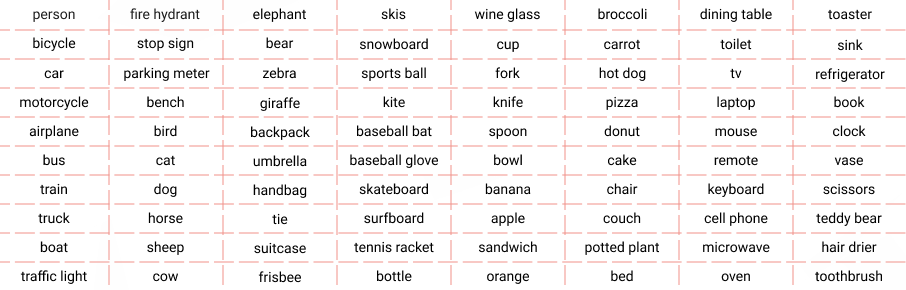

### Detection

YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. `yolov8n.pt` and are pretrained on COCO. See [Detection Docs](https://docs.ultralytics.com/tasks/detect/) for full details.


In [ ]:
# Load YOLOv8n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
# model.train(data='coco128.yaml', epochs=3)  # train the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

result = results[0]
img_array = np.array(result.plot())[:,:,::-1]
cv2_imshow(img_array)

### Segmentation

YOLOv8 _segmentation_ models use the `-seg` suffix, i.e. `yolov8n-seg.pt` and are pretrained on COCO. See [Segmentation Docs](https://docs.ultralytics.com/tasks/segment/) for full details.


In [ ]:
# Load YOLOv8n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model
# model.train(data='coco128-seg.yaml', epochs=3)  # train the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

result = results[0]
img_array = np.array(result.plot())[:,:,::-1]
cv2_imshow(img_array)

### Classification

YOLOv8 _classification_ models use the `-cls` suffix, i.e. `yolov8n-cls.pt` and are pretrained on ImageNet. See [Classification Docs](https://docs.ultralytics.com/tasks/classify/) for full details.

In [ ]:
# Load YOLOv8n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-cls.pt')  # load a pretrained YOLOv8n classification model
# model.train(data='mnist160', epochs=3)  # train the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

result = results[0]
img_array = np.array(result.plot())[:,:,::-1]
cv2_imshow(img_array)

### Pose

YOLOv8 _pose_ models use the `-pose` suffix, i.e. `yolov8n-pose.pt` and are pretrained on COCO Keypoints. See [Pose Docs](https://docs.ultralytics.com/tasks/pose/) for full details.

In [ ]:
# Load YOLOv8n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolov8n-pose.pt')  # load a pretrained YOLOv8n classification model
# model.train(data='coco8-pose.yaml', epochs=3)  # train the model
results = model('https://ultralytics.com/images/bus.jpg')  # predict on an image

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

result = results[0]
img_array = np.array(result.plot())[:,:,::-1]
cv2_imshow(img_array)

### Results

[Working with Results](https://docs.ultralytics.com/modes/predict/#working-with-results)

### Custom dataset

1. Online data annotation using [roboflow](https://roboflow.com/)
  
  - [Roboflow Getting Started Video](https://www.youtube.com/watch?v=a3SBRtILjPI)

2. Offline data annotation using [labelImg](https://pypi.org/project/labelImg/)

[Example Dataset](https://universe.roboflow.com/evankim9903-gmail-com/gauge_detection)